In [26]:
# Python ≥3.5 is required
import sys

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

In [9]:
X = iris["data"][:, 2:]
y = iris["target"]

In [10]:
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [18]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, 
                feature_names = iris["feature_names"][2:],
                class_names = iris["target_names"],
                filled = True,
                rounded = True,
                out_file = ("iris_tree.dot"))

In [19]:
pwd

'/Users/cmeena/Desktop/ML Practice/TensorFlow Developer/Aurelion Book/Ch 6'

In [20]:
! dot -Tpng iris_tree.dot -o iris_tree.png

In [21]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [22]:
tree_clf.predict([[5, 1.5]])

array([1])

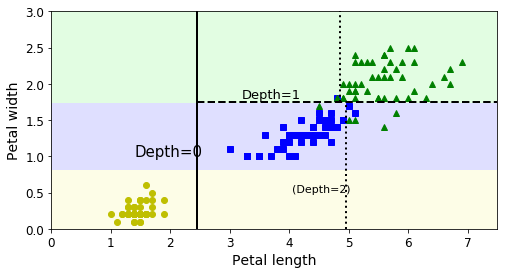

In [29]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from matplotlib.colors import ListedColormap


def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

# save_fig("decision_tree_decision_boundaries_plot")
plt.show()

### *Question 7*

In [42]:
from sklearn.datasets import make_moons

In [43]:
X, y = make_moons(n_samples = 10000, noise = 0.4, random_state = 42)

In [44]:
X, y

(array([[ 0.9402914 ,  0.12230559],
        [ 0.12454026, -0.42477546],
        [ 0.26198823,  0.50841438],
        ...,
        [-0.24177973,  0.20957199],
        [ 0.90679645,  0.54958215],
        [ 2.08837082, -0.05050728]]), array([1, 0, 0, ..., 1, 0, 1]))

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 42)
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
dt_clf_cv = GridSearchCV(dt_clf, params, verbose = 1, cv = 3)

dt_clf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    7.5s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [53]:
dt_clf_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [54]:
from sklearn.metrics import accuracy_score
y_pred = dt_clf_cv.predict(X_test)

accuracy_score(y_test, y_pred)

0.8695